# Introduction & Objectives

# Setup & Data Loading

In [1]:
import os
os.chdir("..")
print("Working dir:", os.getcwd())

Working dir: d:\Projects\ufo_sightings_eda


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ufo_df = pd.read_csv("data/raw/ufo_sightings_scrubbed.csv", parse_dates=["datetime"])

C:\Users\alexi\AppData\Local\Temp\ipykernel_22088\2557818409.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv("data/raw/ufo_sightings_scrubbed.csv", parse_dates=["datetime"])


### 1 Initial Inspection (rows, columns, dtypes)

In [4]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [5]:
# removing unwanted spaces in column names
ufo_df.columns = ufo_df.columns.str.strip()

In [6]:
ufo_df.shape

(80332, 11)

In [7]:
# Checking for duplicates
ufo_df.duplicated().sum()

np.int64(0)

### Sanity Check - datetime

In [8]:
ufo_df["datetime"].describe()

count                            80332
mean     2004-05-17 04:07:35.261166336
min                1906-11-11 00:00:00
25%                2001-08-02 21:45:00
50%                2006-11-22 04:05:00
75%                2011-06-21 00:30:00
max                2014-05-08 18:45:00
Name: datetime, dtype: object

### Sanity Check - city

In [9]:
city = ufo_df["city"]

In [10]:
city.nunique()

19900

In [11]:
city.value_counts(dropna=False)

city
seattle                     525
phoenix                     454
portland                    374
las vegas                   368
los angeles                 353
                           ... 
timonium                      1
shicksinny                    1
history channel/illinois      1
rocky boy                     1
troy (east of)                1
Name: count, Length: 19900, dtype: int64

### Handling missing values

In [12]:
# Total number of NaN values
nan_col_count = dict(ufo_df.isna().sum())

In [13]:
total_rows = ufo_df.shape[0]

In [14]:
# missing values in percentage
for k, v in nan_col_count.items():
    print(f"% of NaN in {k}: {round((v / total_rows) * 100, 2)}%; row counts: {v}")

% of NaN in datetime: 0.0%; row counts: 0
% of NaN in city: 0.0%; row counts: 0
% of NaN in state: 7.22%; row counts: 5797
% of NaN in country: 12.04%; row counts: 9670
% of NaN in shape: 2.41%; row counts: 1932
% of NaN in duration (seconds): 0.0%; row counts: 0
% of NaN in duration (hours/min): 0.0%; row counts: 0
% of NaN in comments: 0.02%; row counts: 15
% of NaN in date posted: 0.0%; row counts: 0
% of NaN in latitude: 0.0%; row counts: 0
% of NaN in longitude: 0.0%; row counts: 0


### Handling missing values

Found 4 columns with NaN values. They're state, country, shape, comments
- **Column:** *comments*

    - No of empty rows: 15 (0.02% of total rows)
    - Replaced NaN with "No comment"

- **Column:** *shape*

    - No of empty rows: 1932 (2.41% of total rows)
    - Replaced NaN with "unknown". this will maintain the consistency with the existing "unknown" category.

- **Column:** *state*

    - No of empty rows: 5797 (7.22% of total rows)
    - Replaced NaN with "No comment"

- **Column:** *country*

    - No of empty rows: 9670 (12.04% of total rows)
    - Replaced NaN with "No comment"

In [15]:
# comment column
print(ufo_df["comments"].isna().sum())
ufo_df["comments"] = ufo_df["comments"].fillna("No comment")

15


In [16]:
print(ufo_df["comments"].isna().sum())

0


In [17]:
#shape column
ufo_df["shape"].nunique()

29

In [18]:
ufo_df["shape"].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [19]:
ufo_df["shape"].value_counts(dropna=False)

shape
light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
NaN           1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64

In [20]:
ufo_df["shape"] = ufo_df["shape"].fillna("unknown")

In [21]:
ufo_df["shape"].isna().sum()

np.int64(0)

state & country column diagnosis

In [22]:
# state column
state = ufo_df["state"]
state.nunique()

67

In [23]:
state.unique()

array(['tx', nan, 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky',
       'mi', 'ma', 'ks', 'sc', 'wa', 'ab', 'co', 'nh', 'wi', 'me', 'ga',
       'pa', 'il', 'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf',
       'ne', 'or', 'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok',
       'ri', 'nb', 'vt', 'la', 'pr', 'ak', 'ms', 'ut', 'md', 'mt', 'sk',
       'wy', 'sd', 'pq', 'ns', 'qc', 'de', 'nd', 'dc', 'nt', 'sa', 'yt',
       'yk', 'pe'], dtype=object)

<Axes: xlabel='state'>

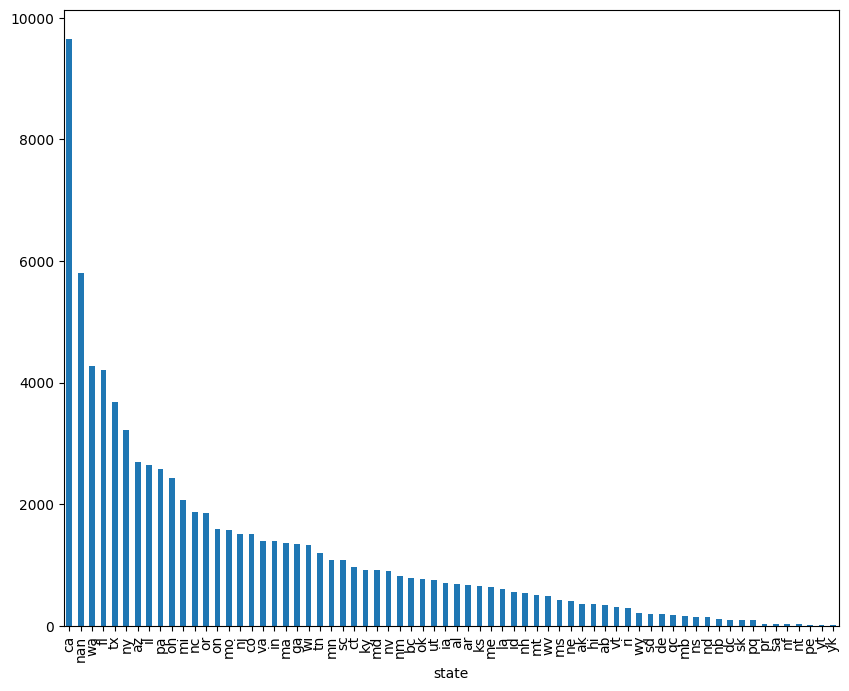

In [24]:
state.value_counts(dropna=False).plot(kind="bar", figsize=(10, 8))

In [25]:
# country column
country = ufo_df["country"]
country.nunique()

5

- **Germany:** The dataset does not provide any state level information. 

- **Great Britain:** 
    - There are total of 1905 rows, out of that 1893 already had missing state values. The 12 remaining rows contained non-Great Britain state codes ('wv', 'la', 'bc', 'tn', 'nc', 'ms', 'sk', 'yt', 'nt', 'ri','ns'). 
    - The codes were further investigated using city + lat/long and found out that all 12 rows is located within Great Britain but only the states codes are invalid. 
    - The invalid rows state codes were repalced with "NaN. As a result, all Great Britain rows have state = NaN.

- **Australia:**
    - There are total of 537 rows, out of that 531 already had missing state values. The 6 remaining rows contained non-Australian state codes (wa (2), sa (2), dc (1), al (1), oh (1)). 
    - The codes were further investigated using city + lat/long and found out that all 6 rows is located within Australian continent but only the states codes are invalid. 
    - The invalid rows state codes were repalced with "NaN. As a result, all Australian rows have state = NaN.

In [26]:
ufo_df.loc[ufo_df["country"] == "gb", "country"].count()

np.int64(1905)

In [27]:
ufo_df[country.isin(["de"])]["state"].unique()

array([nan], dtype=object)

In [28]:
ufo_df[country.isin(["gb"])]["state"].unique()

array([nan, 'wv', 'la', 'bc', 'tn', 'nc', 'ms', 'sk', 'yt', 'nt', 'ri',
       'ns'], dtype=object)

In [29]:
ufo_df[country.isin(["gb"])]["state"].value_counts(dropna=False)

state
NaN    1893
ns        2
la        1
wv        1
bc        1
tn        1
ms        1
nc        1
sk        1
yt        1
nt        1
ri        1
Name: count, dtype: int64

In [30]:
gb_state = ['wv', 'la', 'bc', 'tn', 'nc', 'ms', 'sk', 'yt', 'nt', 'ri','ns']

ufo_df[(country == "gb") & (state.isin(gb_state))]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10194,2006-11-17 18:25:00,trowbridge (uk/england),wv,gb,circle,600,10minutes,U.F.O.sighting in Wiltshire,2006-12-07,51.318889,-2.208611
12311,2003-11-22 20:50:00,fleetwood (lancashire) (uk/england),la,gb,circle,600,10 minutes,My friends daughter phoned her father to say t...,2003-11-26,53.916667,-3.000000
14588,2013-01-14 02:15:00,bradford (uk/england),bc,gb,circle,86400,week day,((HOAX)) Circle and big.,2013-02-04,51,-3.183333
25070,2006-01-07 06:40:00,lyme regis (uk/england),tn,gb,triangle,600,20-30,an amazing crafts with very bright lights and ...,2006-02-14,50.733333,-2.933333
29791,2009-02-07 19:30:00,morton (near norwich) (uk/england),nc,gb,light,600,10 minutes,Succession of 10-12 silent&#44 glowing orange ...,2009-03-19,51.611667,-2.512500
39729,2007-04-29 22:00:00,lancaster (uk/england).,ms,gb,light,180,3 minutes,ORANGE LIGHT OVER IRISH SEA IN UK. SEEN TO ACC...,2007-06-12,54.066667,-2.833333
42659,2010-05-15 22:30:00,preston (uk/england),sk,gb,fireball,60,1 minute,looked like a plane but was lit up red and the...,2010-06-03,50.783333,-0.466667
46146,2014-05-07 11:56:00,heswall (uk/england),yt,gb,triangle,40,40 seconds,((HOAX??)) Long triangle object moves with sp...,2014-05-08,53.316667,-3.100000
47225,1978-06-01 06:30:00,felixstowe (uk/england),nt,gb,sphere,900,15 min,jUST TO MAKE SURE PLEASE DO NOT INCLUDE MY NA...,2008-06-12,51.966667,1.350000
67792,2009-08-19 22:00:00,leeds (uk/england),ri,gb,unknown,120.0,2 minutes,controlled and deliberate manouvers,2009-08-27,53.8,-1.583333


In [31]:
ufo_df.loc[state.isin(gb_state), "state"] = np.nan

In [32]:
country.value_counts(dropna=False)

country
us     65114
NaN     9670
ca      3000
gb      1905
au       538
de       105
Name: count, dtype: int64

There are five countries in this dataset
- USA (us)
- Canada (ca)
- Great Britain (gb)
- Australia (au)
- Germany (de)

Majoritry is from US and second majority is NaN. 

In [33]:
# Working on country = "au"
ufo_df[ufo_df["country"] == "au"]["state"].value_counts(dropna=False)

state
NaN    531
wa       2
sa       2
dc       1
al       1
oh       1
Name: count, dtype: int64

In [34]:
# Replaced all state values with NaN for country = au
ufo_df.loc[(country == "au") & (state.isin(["wa",  "sa", "dc", "al", "oh"])), "state"] = np.nan

In [35]:
us_ca_codes = {
  "us": { "al", "ak", "az", "ar", "ca", "co", "ct", "dc", "de", "fl",
          "ga", "hi", "ia", "id", "il", "in", "ks", "ky", "la", "ma",
          "md", "me", "mi", "mn", "mo", "ms", "mt", "nc", "nd", "ne",
          "nh", "nj", "nm", "nv", "ny", "oh", "ok", "or", "pa", "ri",
          "sc", "sd", "tn", "tx", "ut", "va", "vt", "wa", "wi", "wv",
          "wy", "pr" },

  "ca": { "ab", "bc", "mb", "nb", "nl", "nt", "ns", "nu", "on", "pe",
          "qc", "sk", "yt" }
}

In [36]:
ufo_df[ufo_df["country"] == "ca"]["country"].count()

np.int64(3000)

In [37]:
#  Working on country = "ca"
ufo_df[ufo_df["country"] == "ca"]["state"].value_counts(dropna=False)

state
on     1354
NaN     903
ab      288
mb      127
qc      124
nb       86
pq       64
sa       27
nf       15
pe       10
yk        2
Name: count, dtype: int64

In [38]:
## The below "mask" should be checked because its only for canada and i have also done a ca_mask somewhere

In [39]:
#  Checking for invalid states codes for county == "ca"
mask = (country == "ca") & (~state.isin(us_ca_codes["ca"]) & (~state.isna()))
ufo_df[mask]["state"].value_counts()

state
pq    64
sa    27
nf    15
yk     2
Name: count, dtype: int64

**Canada — State Code Corrections**

- **yk** → ***yt*** (Yukon)
    Likely a typo; corrected to the official code *yt*.

- **nf** → ***nl*** (Newfoundland and Labrador)
    nf was the old Canada Post abbreviation before 2001; updated to *nl*.

- **sa** → ***sk*** (Saskatchewan)
    sa is not a valid Canadian code. Based on the Canada geography and the fact that “Saskatoon” is the largest city in Saskatchewan (Canada), the code was corrected to *sk*.

- **pq** → ***qc*** (Québec)
    pq was the old abbreviation for Québec; updated to *qc*.


In [40]:
ufo_df.loc[(mask) & (state == "yk"), "state"] = "yt"
ufo_df.loc[(mask) & (state == "nf"), "state"] = "nl"
ufo_df.loc[(mask) & (state == "sa"), "state"] = "sk"
ufo_df.loc[(mask) & (state == "pq"), "state"] = "qc"

In [41]:
# futher investigating missing values in state code for country == "ca"
ca_mask = (country == "ca") &  (state.isna())
ufo_df.loc[ca_mask].info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 95 to 80295
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              903 non-null    datetime64[ns]
 1   city                  903 non-null    object        
 2   state                 0 non-null      object        
 3   country               903 non-null    object        
 4   shape                 903 non-null    object        
 5   duration (seconds)    903 non-null    object        
 6   duration (hours/min)  903 non-null    object        
 7   comments              903 non-null    object        
 8   date posted           903 non-null    object        
 9   latitude              903 non-null    object        
 10  longitude             903 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 84.7+ KB


In [42]:
ufo_df.loc[ca_mask].drop_duplicates().to_csv("data/interim/canada_nan_cities.csv", index=True)

In [43]:
province_to_code = {
    "British Columbia": "bc",
    "Nova Scotia": "ns",
    "Saskatchewan": "sk",
    "Prince Edward Island": "pe",
    "Ontario": "on",
    "Quebec": "qc",
    "Manitoba": "mb",
    "Northwest Territories": "nt",
    "Nunavut": "nu",
    "Yukon": "yt",
    "New Brunswick": "nb",
}

Mapping the state with state abbreviation in the file canada_nan_cities_mapped.csv. 

In [44]:
ca_state_map_df = pd.read_csv(
    "data/interim/canada_nan_cities_mapped.csv", 
    usecols=["Unnamed: 0", "results_state"], 
    index_col=["Unnamed: 0"]
    )

In [45]:
ca_state_map_df.head()

,results_state
Unnamed: 0,
95,Prince Edward Island
104,British Columbia
735,British Columbia
746,Saskatchewan
862,Saskatchewan


In [46]:
ca_state_map_df["state"] = ca_state_map_df["results_state"].map(province_to_code)

In [47]:
ca_state_map_df.tail()

,results_state,state
Unnamed: 0,,
77152,British Columbia,bc
77232,British Columbia,bc
77549,British Columbia,bc
77750,British Columbia,bc
78211,British Columbia,bc


Now combine the ufo_df with the canada_nan_cities_mapped.csv by index

654 remaining state columns were without state for the country "ca" and used the python script to find the state value using latitude and longtiude. Then saved that to a new csv. Then added that to a df and combined with the original dataframe to fill the missing values in state columns 

In [48]:
ufo_df["state"] = ufo_df["state"].fillna(ca_state_map_df["state"])

In [49]:
ca_nan_remain = ufo_df[ca_mask].loc[ufo_df["state"].isna()]

In [50]:
ca_nan_remain.to_csv("data/interim/canada_nan_reamining.csv", index=True)

In [51]:
ca_nan_remain_df = pd.read_csv(
    "data/interim/canada_nan_remaining_mapped.csv",
    usecols=["Unnamed: 0", "results_state"],
    index_col=["Unnamed: 0"]
)

In [52]:
ca_nan_remain_df["state"] = ca_nan_remain_df["results_state"].map(province_to_code)

In [53]:
ca_nan_remain_df.head()

,results_state,state
Unnamed: 0,,
114,Prince Edward Island,pe
576,Prince Edward Island,pe
919,Saskatchewan,sk
1096,Prince Edward Island,pe
2510,Prince Edward Island,pe


In [54]:
ufo_df["state"] = ufo_df["state"].fillna(ca_nan_remain_df["state"])

In [55]:
ufo_df.isna().sum()

datetime                    0
city                        0
state                   10814
country                  9670
shape                       0
duration (seconds)          0
duration (hours/min)        0
comments                    0
date posted                 0
latitude                    0
longitude                   0
dtype: int64

Dealing with US states Nan Values

In [56]:
us_mask = (ufo_df["country"] == "us") & (ufo_df["state"].isna())

In [57]:
ufo_df[us_mask].shape

(4468, 11)

In [58]:
ufo_df.loc[us_mask].drop_duplicates().to_csv("data/interim/usa_nan_states.csv", index=True)

There ar 4468 countries with column value us and country nan

In [59]:
us_state_abbrev = {
    "Alabama": "al",
    "Alaska": "ak",
    "Arizona": "az",
    "Arkansas": "ar",
    "California": "ca",
    "Colorado": "co",
    "Connecticut": "ct",
    "Delaware": "de",
    "Florida": "fl",
    "Georgia": "ga",
    "Hawaii": "hi",
    "Idaho": "id",
    "Illinois": "il",
    "Indiana": "in",
    "Iowa": "ia",
    "Kansas": "ks",
    "Kentucky": "ky",
    "Louisiana": "la",
    "Maine": "me",
    "Maryland": "md",
    "Massachusetts": "ma",
    "Michigan": "mi",
    "Minnesota": "mn",
    "Mississippi": "ms",
    "Missouri": "mo",
    "Montana": "mt",
    "Nebraska": "ne",
    "Nevada": "nv",
    "New Hampshire": "nh",
    "New Jersey": "nj",
    "New Mexico": "nm",
    "New York": "ny",
    "North Carolina": "nc",
    "North Dakota": "nd",
    "Ohio": "oh",
    "Oklahoma": "ok",
    "Oregon": "or",
    "Pennsylvania": "pa",
    "Rhode Island": "ri",
    "South Carolina": "sc",
    "South Dakota": "sd",
    "Tennessee": "tn",
    "Texas": "tx",
    "Utah": "ut",
    "Vermont": "vt",
    "Virginia": "va",
    "Washington": "wa",
    "West Virginia": "wv",
    "Wisconsin": "wi",
    "Wyoming": "wy"
}


In [60]:
usa_state_map_df = pd.read_csv(
    r"data\interim\usa_nan_cities_mapped.csv", 
    usecols=["Unnamed: 0", "results_state"], 
    index_col=["Unnamed: 0"]
    )

In [61]:
usa_state_map_df.head()

,results_state
Unnamed: 0,
5,Tennessee
11,North Carolina
14,North Carolina
49,North Carolina
53,Tennessee


In [62]:
usa_state_map_df["state"] = usa_state_map_df["results_state"].map(us_state_abbrev)

In [63]:
usa_state_map_df.tail()

,results_state,state
Unnamed: 0,,
80301,Tennessee,tn
80302,North Carolina,nc
80304,Tennessee,tn
80321,Tennessee,tn
80327,Tennessee,tn


In [64]:
ufo_df["state"] = ufo_df["state"].fillna(usa_state_map_df["state"])

In [65]:
ufo_df[us_mask].head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
11,1968-10-10 19:00:00,brevard,nc,us,fireball,180,3 minutes,silent red /orange mass of energy floated by t...,2008-06-12,35.2333333,-82.734444
14,1971-10-10 21:00:00,lexington,nc,us,oval,30,30 seconds,green oval shaped light over my local church&#...,2010-02-14,35.8238889,-80.253611
49,1991-10-10 22:00:00,frisco,nc,us,unknown,1800,30 minutes,A friend and myself were standing on the shore...,1999-01-28,35.235,-75.628889
53,1992-10-10 20:15:00,seymour,tn,us,cigar,60,1min. 39s,Stationary Elongated UFO 200ft above vacant fi...,2008-10-31,35.8905556,-83.724722


Checking for NaN values in state where county is us, or ca and not au, de, gb

In [66]:
ufo_df.loc[(ufo_df["country"].isin(["us", "ca"])) & (ufo_df["state"].isna()), "country"].value_counts()

Series([], Name: count, dtype: int64)

Check Individually each countries and if here is any nan in their state column. For au, de, db will be having nan values. But for ca it should be zero and in the us there may be some missing values

In [67]:
ufo_df.loc[(ufo_df["state"].isna()) & (ufo_df["country"].isin(["ca", "us"])), ["state", "country"]].value_counts()

Series([], Name: count, dtype: int64)

In [68]:
ufo_df.loc[(ufo_df["state"].isna()), ["country"]].value_counts()

country
gb         1905
au          538
de          105
Name: count, dtype: int64

Check for rows that has nan in country column and values in state columns

In [69]:
ufo_df.loc[ufo_df["country"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9670 entries, 1 to 80324
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              9670 non-null   datetime64[ns]
 1   city                  9670 non-null   object        
 2   state                 5872 non-null   object        
 3   country               0 non-null      object        
 4   shape                 9670 non-null   object        
 5   duration (seconds)    9670 non-null   object        
 6   duration (hours/min)  9670 non-null   object        
 7   comments              9670 non-null   object        
 8   date posted           9670 non-null   object        
 9   latitude              9670 non-null   object        
 10  longitude             9670 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 906.6+ KB


There are 9670 rows in the column "country" has NaN value.

1. find the rows that has values in state columns but country is missing

In [70]:
ufo_df.loc[(ufo_df["country"].isna()) & ~(ufo_df["state"].isna()), "state"].count()

np.int64(5872)

There are 5872 rows with values in state but missing values in country columns. 
- Need to check whether these values are states in us and canada. 
- If these values are not in us and ca, then investigate those rows.
- If these values are of us and ca then map these using the us_ca_codes

In [71]:
nan_country_mask = (ufo_df["country"].isna()) & ~(ufo_df["state"].isna())
ufo_df[nan_country_mask].head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
29,1979-10-10 22:00:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,2005-01-19,53.970571,-111.689885
40,1986-10-10 20:00:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,2007-10-08,41.523427,-73.646795
47,1989-10-10 21:00:00,kranklin,ky,NaN,triangle,180,3min,Triangle seen in franklin Ky - october 1989,2005-05-11,36.722263,-86.577218
58,1994-10-10 15:00:00,mercedies,tx,NaN,cigar,3600,1 hour,ufo chased by fighter jet over Rio Grande Vall...,2011-12-12,26.149798,-97.913611


In [72]:
list(ufo_df[nan_country_mask]["state"].unique())

['tx',
 'ab',
 'ny',
 'ky',
 'fl',
 'wi',
 'mo',
 'mi',
 'nj',
 'ar',
 'pa',
 'ca',
 'ma',
 'on',
 'ne',
 'oh',
 'ut',
 'hi',
 'in',
 'me',
 'il',
 'wa',
 'ga',
 'ak',
 'nv',
 'sc',
 'mn',
 'or',
 'mb',
 'al',
 'co',
 'az',
 'va',
 'ct',
 'nf',
 'nm',
 'ok',
 'nh',
 'ks',
 'qc',
 'vt',
 'dc',
 'mt',
 'md',
 'ia',
 'nb',
 'yk',
 'wy',
 'id',
 'sd',
 'pq',
 'nd',
 'de',
 'pe',
 'pr',
 'sa']

Checked whether us and ca share any same state abbreviation and found out they dont. so i combined both country's state abbreviation to check whether any other code is there because of typo or other mistake and found out there isnt.

In [73]:
us_ca_list = list(us_ca_codes["us"]) + list(us_ca_codes["ca"])

In [74]:
for val in list(ufo_df[nan_country_mask]["state"].unique()):
    if val not in us_ca_list:
        print(val)

nf
yk
pq
sa


Mapping the state to their respective countries

In [75]:
def get_country_from_state(state):
    if pd.isna(state):
        return None
    
    if state in us_ca_codes["us"]:
        return "us"
    elif state in us_ca_codes["ca"]:
        return "ca"
    else:
        return None

In [76]:
ufo_df["country"] = ufo_df["state"].apply(get_country_from_state)

In [77]:
ufo_df[nan_country_mask].count()

datetime                5872
city                    5872
state                   5872
country                 5830
shape                   5872
duration (seconds)      5872
duration (hours/min)    5872
comments                5872
date posted             5872
latitude                5872
longitude               5872
dtype: int64

Working on columns that has no country and state values

In [78]:
ufo_df.loc[(ufo_df["country"].isna()) & (ufo_df["state"].isna())].count()

datetime                6346
city                    6346
state                      0
country                    0
shape                   6346
duration (seconds)      6346
duration (hours/min)    6346
comments                6346
date posted             6346
latitude                6346
longitude               6346
dtype: int64

There are 6346 countries with missing values in both state and country columns.nan_col_count

Using the python script that extract value based on longtitude and latitude, will get the values for each country. 

- if the country is any of the 5 countries from the dataset (us, ca, au, gb. de) -> the value will be that itself. if the value is us or ca then the state value will be also extracted. 

- if the county is not from 5 countries list then the value will be rof (rest of world).



In [79]:
ufo_df.loc[(ufo_df["country"].isna()) & (ufo_df["state"].isna())].to_csv("data/interim/country_nan.csv", index=True)

In [80]:
country_nan_df = pd.read_csv(
    "data/interim/country_nan_mapped.csv", 
    usecols=["Unnamed: 0", "results_state", "results_country"],
    index_col="Unnamed: 0"
    )

In [81]:
country_nan_df.tail()

,results_state,results_country
Unnamed: 0,,
80234,NaN,gb
80254,NaN,gb
80255,NaN,de
80322,NaN,row
80324,nc,us


In [82]:
ufo_df["country"] = ufo_df["country"].fillna(country_nan_df["results_country"])

In [83]:
ufo_df.loc[(ufo_df["country"].isna()) | (ufo_df["state"].isna())].count()

datetime                6388
city                    6388
state                     42
country                 6346
shape                   6388
duration (seconds)      6388
duration (hours/min)    6388
comments                6388
date posted             6388
latitude                6388
longitude               6388
dtype: int64

In [84]:
ufo_df["state"] = ufo_df["state"].fillna(country_nan_df["results_state"])

In [85]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74636 non-null  object        
 3   country               80290 non-null  object        
 4   shape                 80332 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80332 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 6.7+ MB


Find the sum of nan value in state.

Find the sum of each countries au, gb, de, row -- the sum of these values should be the sum of total nan value in the dataset.

In [86]:
ufo_df["state"].isna().sum()

np.int64(5696)

In [87]:
ufo_df.loc[ufo_df["country"].isin(["gb", "au", "de", "row"]), "state"].isna().sum()

np.int64(5696)

Looking for unique and weird values

### Data Audit - Column: duration (seconds)
- Found 3 values with backticks (\`2\`, \`8\`, \`0.5\`).
- Applied cleaning: removed backticks, stripped whitespace
- Rows affected: 3


In [88]:
ufo_df["duration (seconds)"].isna().sum()

np.int64(0)

In [89]:
ufo_df["duration_(seconds)_cleaned"] = pd.to_numeric(ufo_df['duration (seconds)'], errors="coerce")

In [90]:
ufo_df["duration_(seconds)_cleaned"].isna().sum()

np.int64(3)

In [91]:
coerced_count = (
    ufo_df["duration_(seconds)_cleaned"].isna().sum()
    - ufo_df["duration (seconds)"].isna().sum()
)

print(f"Values coerced to NaN: {coerced_count}")

Values coerced to NaN: 3


In [92]:
mask = ufo_df["duration_(seconds)_cleaned"].isna() & ~ufo_df["duration (seconds)"].isna()

ufo_df.loc[mask, :]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,duration_(seconds)_cleaned
27822,2000-02-02 19:33:00,bouse,az,us,unknown,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2000-02-16,33.9325,-114.005000,NaN
35692,2005-04-10 22:52:00,santa cruz,ca,us,unknown,8`,eight seconds,2 red lights moving together and apart with a ...,2005-04-16,36.9741667,-122.029722,NaN
58591,2006-07-21 13:00:00,ibague (colombia),NaN,row,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,2006-10-30,4.440663,-75.244141,NaN


In [93]:
ufo_df.drop(columns="duration_(seconds)_cleaned", inplace=True)

In [94]:
# Clean "duration (seconds)" column
ufo_df["duration (seconds)"] = (
    ufo_df["duration (seconds)"]
    .astype(str)
    .str.replace("`", "")
    .str.strip()
)

ufo_df["duration (seconds)"] = pd.to_numeric(ufo_df["duration (seconds)"], errors="coerce")
ufo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74636 non-null  object        
 3   country               80290 non-null  object        
 4   shape                 80332 non-null  object        
 5   duration (seconds)    80332 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80332 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 6.7+ MB


Summary stats before cleaning the "duration (seconds) column"

In [95]:
print(ufo_df["duration (seconds)"].describe().to_string(float_format="{:.2f}".format))

count      80332.00
mean        9016.89
std       620216.79
min            0.00
25%           30.00
50%          180.00
75%          600.00
max     97836000.00


- The dataset contains extreme outliers, which heavily skewing the data. 
- The standard deviation is 620216.79 (i.e ≈ 7 days) showing that the data has extreme variablity due to outliers. 
- The min value is 0 seconds, which is likely due to bad data entry that requires further investigation. 
- The max value is 97836000.00 (≈ 3 years!). Clearly a data entry error.
- Duration percentiles:

  - 25% of sightings lasted <= 30 seconds.
  - 50% of sightings lasted <= 180 seconds (3 minutes)
  - 75% of sightings lasted <= 600 seconds (10 minutes)
  
  These obversations clearly shows that most sightings are short (30 secs - 10 mins).
- Overall, the data is highly skewed and the outliers are needed to be dealt with before any further analysis. 

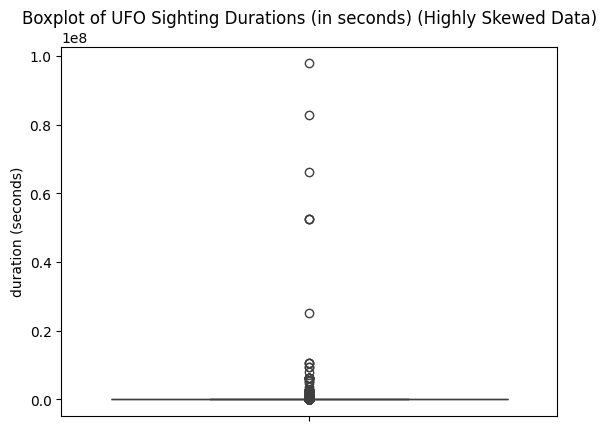

In [96]:
plt.title("Boxplot of UFO Sighting Durations (in seconds) (Highly Skewed Data)")
sns.boxplot(data=ufo_df, y="duration (seconds)")
plt.show()

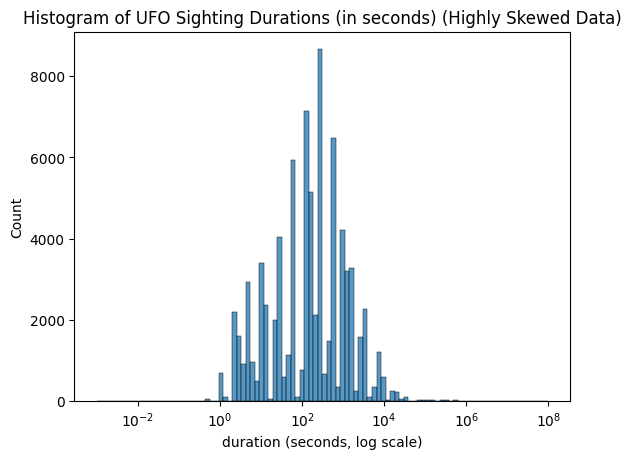

In [97]:
plt.title("Histogram of UFO Sighting Durations (in seconds) (Highly Skewed Data)")
sns.histplot(ufo_df["duration (seconds)"], bins=100, log_scale=(True, False))
plt.xlabel("duration (seconds, log scale)")
plt.show()

Dealing with outliers in Duration column

Investigating and cleaning 0-second durations

In [98]:
ufo_df.loc[ufo_df["duration (seconds)"] < 1]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1659,2011-10-14 21:20:00,holbrook,az,us,other,0.100,.10 seconds,This fast moving craft was low flying and not ...,2011-12-12,34.9022222,-110.157500
2038,2001-10-15 20:22:00,port orchard,wa,us,circle,0.050,.05 seconds,Large blue circular object observed falling at...,2001-11-20,47.5405556,-122.635000
2274,2013-10-15 20:35:00,reseda,ca,us,sphere,0.500,<0.5 second,Green laser ball spontaneously appears at elev...,2013-10-23,34.2011111,-118.535556
2617,2009-10-17 21:30:00,maple lake,mn,us,fireball,0.500,1/2 second,Green fireball north of Maple Lake&#44 Minnesota,2009-12-12,45.2291667,-94.001667
4081,2008-10-23 04:45:00,remote,wy,us,flash,0.001,0.001sec,brilliant strobe light at 4am&#44 moving light...,2009-01-10,-46.163992,169.875050
...,...,...,...,...,...,...,...,...,...,...,...
78381,1999-09-29 14:30:00,warnambool&#44 vic (australia),NaN,au,unknown,0.050,0.05 seconds,It was very quick. We have a picture of it.,1999-11-02,-38.382766,142.484499
78776,2010-09-30 13:05:00,cedar rapids,ia,us,triangle,0.500,about half a second,Flying object in the background of our video i...,2010-11-21,42.008333,-91.643889
79159,2008-09-04 06:15:00,eldridge,al,us,diamond,0.500,0.5 seconds,09/04/08 eldridge&#44al diamond object 0.5 s...,2008-10-31,33.922778,-87.617222
79160,2008-09-04 14:00:00,maury (france),nc,us,triangle,0.500,half a second,triangle shaped craft exceeding 10000 miles an...,2008-10-31,35.480757,-77.586387


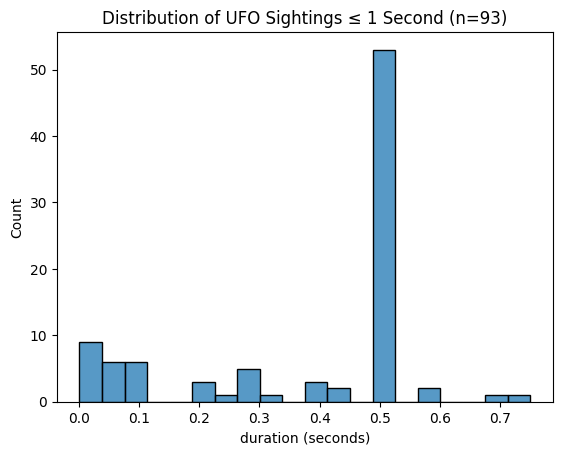

In [99]:
sns.histplot(ufo_df.loc[ufo_df["duration (seconds)"] < 1, "duration (seconds)"], bins=20)
plt.title("Distribution of UFO Sightings ≤ 1 Second (n=93)")
plt.show()

There are 93 sightings with reported durations of ≤ 1 second. Such short durations are likely unrealistic or the result of data entry noise. Therefore, these rows were dropped from the dataset to improve data quality.

In [100]:
ufo_df.drop(ufo_df[ufo_df["duration (seconds)"] < 1].index, inplace=True)

In [101]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80239 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80239 non-null  datetime64[ns]
 1   city                  80239 non-null  object        
 2   state                 74551 non-null  object        
 3   country               80197 non-null  object        
 4   shape                 80239 non-null  object        
 5   duration (seconds)    80239 non-null  float64       
 6   duration (hours/min)  80239 non-null  object        
 7   comments              80239 non-null  object        
 8   date posted           80239 non-null  object        
 9   latitude              80239 non-null  object        
 10  longitude             80239 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 7.3+ MB


Decide on an outlier handling strategy (clip, log transform, or exclude beyond a percentile).

Investigating and cleaning unrealistic max values

In [102]:
ufo_df.loc[ufo_df["duration (seconds)"] > 600] \
.sort_values(by="duration (seconds)", ascending=False).count()

datetime                18341
city                    18341
state                   17151
country                 18331
shape                   18341
duration (seconds)      18341
duration (hours/min)    18341
comments                18341
date posted             18341
latitude                18341
longitude               18341
dtype: int64

A log-spaced binned histogram for the entire datset that shows how spread out the data is in the "duration (seconds)" column. 

In [103]:
s = ufo_df["duration (seconds)"]

bins = np.logspace(
    np.log10(s[s>0].min()), 
    np.log10(s.quantile(0.999)), 
    60
    )

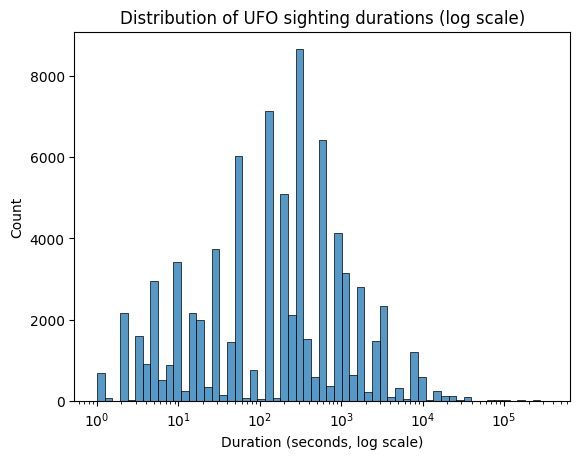

In [104]:
sns.histplot(s[s>0], bins=bins, edgecolor="black", linewidth=0.5)
plt.xscale("log")
plt.xlabel("Duration (seconds, log scale)")
plt.ylabel("Count")
plt.title("Distribution of UFO sighting durations (log scale)")
plt.show()

- X-axis (Duration, log scale):
    - 10<sup>2</sup> = 1000 seconds ≈ 16 minutes
    - 10<sup>3</sup> = 10,000 seconds ≈ 2.7 hours
    - 10<sup>4</sup> = 100,000 seconds ≈ 27 hours (~1 day)
    - 10<sup>5</sup> = 1,000,000 seconds ≈ 11.6 days
- Y-axis (count):
    How many sightings fall into each bin

In [105]:
s_long = ufo_df[ufo_df["duration (seconds)"] > 600]["duration (seconds)"]

# create log-spaced bins
bins_long = np.logspace(
    np.log10(s_long.min()),
    np.log10(s_long.quantile(0.999)),  # cut off extreme outliers
    50
)

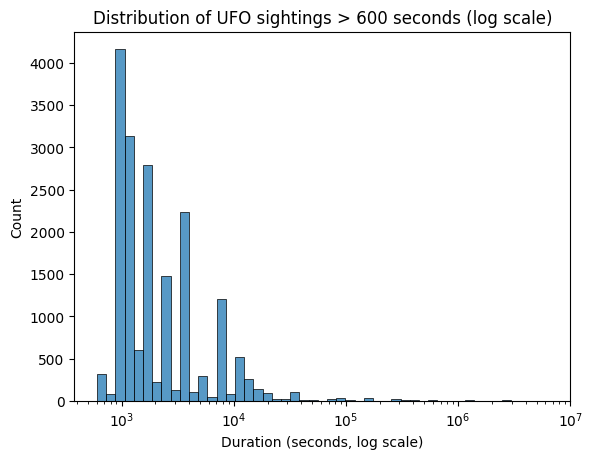

In [106]:
sns.histplot(s_long, bins=bins_long, edgecolor="black", linewidth=0.5)
plt.xscale("log")
plt.xlabel("Duration (seconds, log scale)")
plt.ylabel("Count")
plt.title("Distribution of UFO sightings > 600 seconds (log scale)")
plt.show()

- 600 seconds (10 minutes) was the cutoff used to define "long sightings".
- A total of 18341 values are above 600s. 
- The majority of hte cluster fall between 15 - 30 minutes in the long sightings category. 
- A small number of extreme outliers extend into days or even weeks, which are likely due to overestimation or data entry errors.”

In [107]:
bins = [600, 1800, 3600, 10800, 21600, 43200, 86400, 604800, float("inf")]
labels = [
    "10–30 min",
    "30–60 min",
    "1–3 hr",
    "3–6 hr",
    "6–12 hr",
    "12–24 hr",
    "1–7 days",
    ">7 days"
]

In [108]:
s_long_binned = pd.cut(s_long, bins=bins, labels=labels, right=False)

In [109]:
counts = s_long_binned.value_counts().sort_index()
percentages = (counts / len(s_long) * 100).round(2)

summary = pd.DataFrame({"Count": counts, "Percentage": percentages})
summary

,Count,Percentage
duration (seconds),,
10–30 min,8338,45.46
30–60 min,4596,25.06
1–3 hr,3957,21.57
3–6 hr,933,5.09
6–12 hr,255,1.39
12–24 hr,45,0.25
1–7 days,148,0.81
>7 days,69,0.38


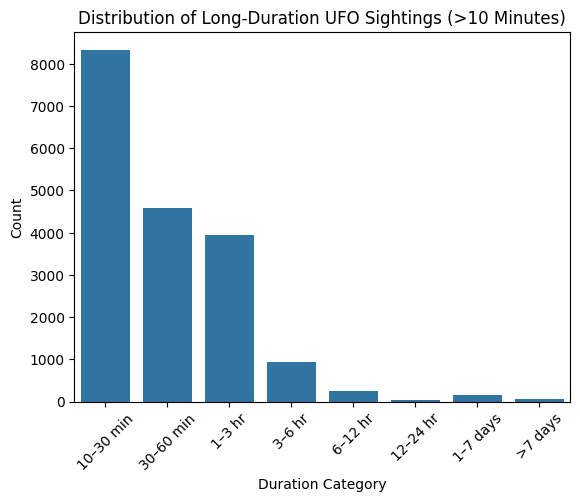

In [110]:
sns.barplot(summary, x="duration (seconds)", y="Count")
plt.xticks(rotation=45)
plt.title("Distribution of Long-Duration UFO Sightings (>10 Minutes)")
plt.xlabel("Duration Category")
plt.show()

Out of 18,341 long-duration sightings (>10 minutes), only 217 (~1.2%) lasted longer than 24 hours.

Relative to the full dataset (80322 rows), this represents just ~0.3% of the reported sightings. Because of the negligible proportion and how much these values are skewing the distribution, these rows were dropped for further analysis.

In [111]:
ufo_df.drop(ufo_df[ufo_df["duration (seconds)"] >= 86400].index, inplace=True)

In [112]:
ufo_df["duration (seconds)"].describe()

count    80022.000000
mean       887.839515
std       2881.677718
min          1.000000
25%         30.000000
50%        180.000000
75%        600.000000
max      73800.000000
Name: duration (seconds), dtype: float64

- Re-analyze distribution after cleaning to confirm skew reduction.

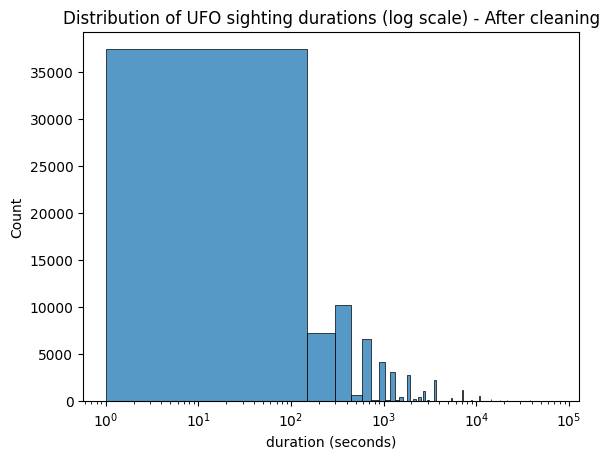

In [113]:
sns.histplot(ufo_df["duration (seconds)"], bins=500, linewidth=0.5)
plt.title("Distribution of UFO sighting durations (log scale) - After cleaning")
plt.xscale("log")
plt.show()

- After cleaning mult-day and mult-year outliers are gone. 
- Distribution focuses on plausible values.
- Most UFO sightings are short. These clusters are between a few seconds and few minutes. 
- Very long sightings exists but are much rarer. 

Summary stats after cleaning

In [114]:
print(ufo_df["duration (seconds)"].describe().to_string(float_format="{:.2f}".format))

count   80022.00
mean      887.84
std      2881.68
min         1.00
25%        30.00
50%       180.00
75%       600.00
max     73800.00


In [115]:
ufo_df["duration (seconds)"].describe(percentiles=[.25, .5, .75, .9, .95, .99])

count    80022.000000
mean       887.839515
std       2881.677718
min          1.000000
25%         30.000000
50%        180.000000
75%        600.000000
90%       1800.000000
95%       3600.000000
99%      10800.000000
max      73800.000000
Name: duration (seconds), dtype: float64

### Sanity Check - Longitude

Checked the minimum and maximum values for longtitude and confirmed that values are within the valid range -180 to 180.


In [116]:
ufo_df["longitude"].describe()

count    80022.000000
mean       -86.788383
std         39.639786
min       -176.658056
25%       -112.073333
50%        -87.902778
75%        -78.758326
max        178.441900
Name: longitude, dtype: float64

### Data Audit - Column: latitude              
- Found 1 invalid entry: "33q.200088"
    Cross checked the latitude using the longtiude (-105.624152), city (Mescalero Indian Reservation), and state (NM) and confirmed that the correct latitude for this region is ≈ 33.2°N, indicating that the "q" is a typo. 
- Applied cleaning: removed "q" character
- Rows affected: 1


In [117]:
ufo_df["latitude"].isna().sum()


np.int64(0)

In [118]:
ufo_df["latitude_cleaned"] = pd.to_numeric(ufo_df["latitude"], errors="coerce")

In [119]:
ufo_df["latitude_cleaned"].isna().sum()

np.int64(1)

In [120]:
coerced_count = (
    ufo_df["latitude_cleaned"].isna().sum()
    - ufo_df["latitude"].isna().sum()
)

print(f"Values coerced to NaN: {coerced_count}")

Values coerced to NaN: 1


In [121]:
lat_mask = ~ufo_df["latitude"].isna() & ufo_df["latitude_cleaned"].isna()

ufo_df[lat_mask]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,latitude_cleaned
43782,1974-05-22 05:30:00,mescalero indian reservation,nm,us,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,33q.200088,-105.624152,NaN


In [122]:
ufo_df.drop(columns="latitude_cleaned", inplace=True) 

In [123]:
# Clean "latitude" column
ufo_df["latitude"] = (
    ufo_df["latitude"]
    .astype(str)
    .str.replace("q", "")
    .str.strip()
)

ufo_df["latitude"] = pd.to_numeric(ufo_df['latitude'], errors="coerce")
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80022 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80022 non-null  datetime64[ns]
 1   city                  80022 non-null  object        
 2   state                 74363 non-null  object        
 3   country               79980 non-null  object        
 4   shape                 80022 non-null  object        
 5   duration (seconds)    80022 non-null  float64       
 6   duration (hours/min)  80022 non-null  object        
 7   comments              80022 non-null  object        
 8   date posted           80022 non-null  object        
 9   latitude              80022 non-null  float64       
 10  longitude             80022 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 7.3+ MB


In [124]:
ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


All major data quality issues have been resolved. The dataset is now suitable for EDA. 

Saving the cleaned dataset into a .csv file 

In [128]:
ufo_df.to_csv("data/processed/ufo_clean.csv", index=False)